In [1]:
%matplotlib inline
import time, csv
import matplotlib.pyplot as plt
import numpy as np

# US Mass Shootings, 1982-2018: Data From Mother Jones’ Investigation
# https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/

T = list()
L = list()
F = list()

with open("us_mass_shootings.csv") as f:
    for row in csv.DictReader(f):
        date = row["Date"]
        fatals = int(row["Fatalities"])
        wlegal = row["Weapons obtained legally"]
        date = time.strptime(date, "%m/%d/%Y")
        date = date.tm_year + (date.tm_mon-1) / 12
        wlegal = \
                1.0 if "Yes" in wlegal else \
                0.0 if "No" in wlegal else 0.5
        T.append(date)
        L.append(wlegal)
        F.append(fatals)

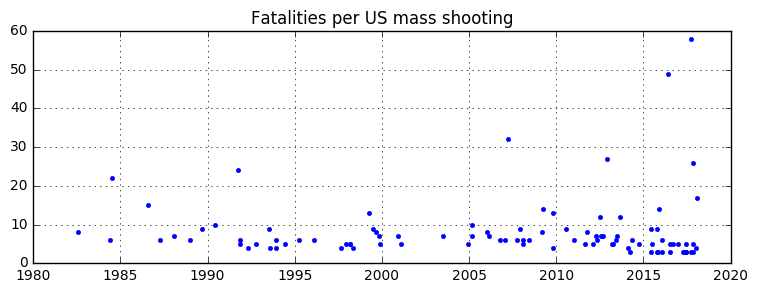

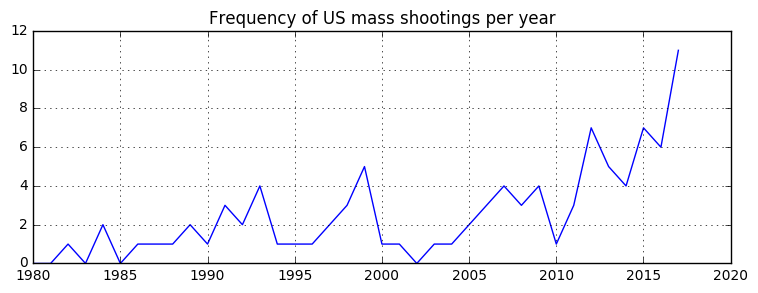

In [2]:
plt.figure(figsize=(9, 3))
plt.title("Fatalities per US mass shooting")
plt.plot(T, F, ".")
plt.grid()
plt.show()

plt.figure(figsize=(9, 3))
plt.title("Frequency of US mass shootings per year")
X, Y = list(), list()
for y in range(1980, 2018):
    v = sum([1 for i in range(len(F)) if y <= T[i] < y+1])
    X.append(y)
    Y.append(v)
plt.plot(X, Y)
plt.grid()
plt.show()

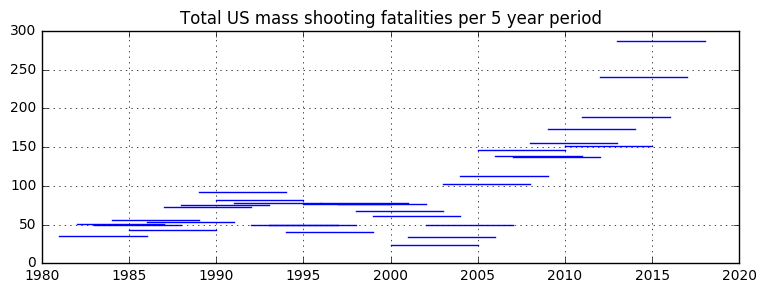

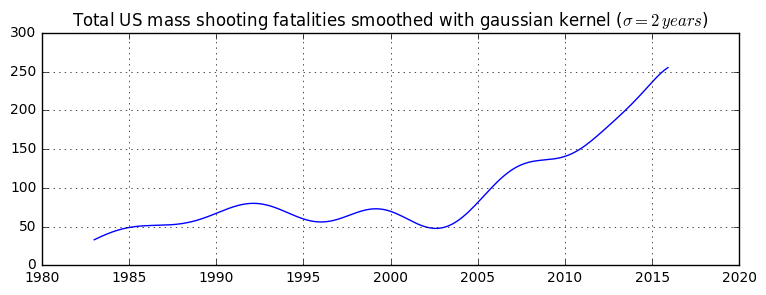

In [3]:
plt.figure(figsize=(9, 3))
plt.title("Total US mass shooting fatalities per 5 year period")
for y in range(1981, 2014):
    f = sum([F[i] for i in range(len(F)) if y <= T[i] < y+5])
    plt.plot([y, y+5], [f, f], "b")
plt.grid()
plt.show()

plt.figure(figsize=(9, 3))
plt.title("Total US mass shooting fatalities smoothed with gaussian kernel ($\sigma=2\,years$)")
X, Y = list(), list()
for y in np.arange(1983, 2016, 0.1):
    v = 0.0
    for t, f in zip(T, F):
        v += f * np.exp(-0.5 * ((y - t) / 2)**2)
    X.append(y)
    Y.append(v)
plt.plot(X, Y)
plt.grid()
plt.show()

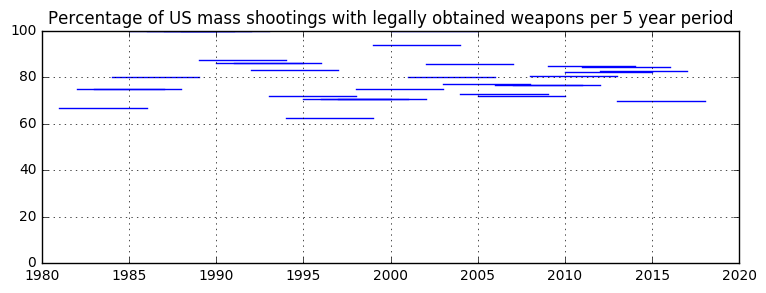

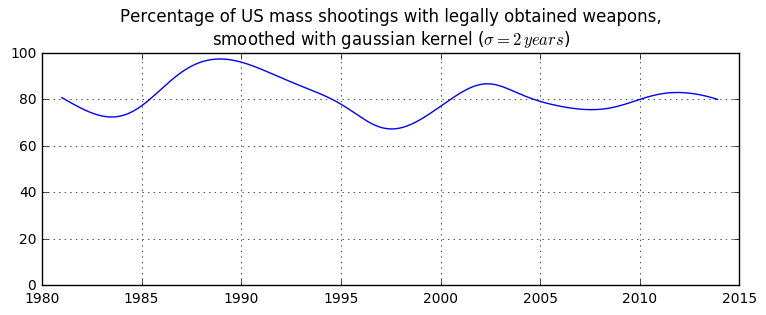

In [4]:
plt.figure(figsize=(9, 3))
plt.title("Percentage of US mass shootings with legally obtained weapons per 5 year period")
for y in range(1981, 2014):
    s = sum([L[i] for i in range(len(L)) if y <= T[i] < y+5])
    c = sum([1 for i in range(len(L)) if y <= T[i] < y+5])
    v = 100 * s / c
    plt.plot([y, y+5], [v, v], "b")
plt.ylim(0, 100)
plt.grid()
plt.show()

plt.figure(figsize=(9, 3))
plt.title("Percentage of US mass shootings with legally obtained weapons,\n" +
          "smoothed with gaussian kernel ($\sigma=2\,years$)")
X, Y = list(), list()
for y in np.arange(1981, 2014, 0.1):
    s = sum([np.exp(-0.5 * ((y - T[i]) / 2)**2) * L[i] for i in range(len(L))])
    c = sum([np.exp(-0.5 * ((y - T[i]) / 2)**2) for i in range(len(L))])
    X.append(y)
    Y.append(100 * s / c)
plt.plot(X, Y)
plt.ylim(0, 100)
plt.grid()
plt.show()